In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

## PART D

In [3]:
# Split data into predictors and target
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Strength']] # independen
target = df['Strength'] # dependent

In [4]:
print(predictors.shape)
print(target.shape)

(1030, 8)
(1030,)


In [5]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.30, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 309
number of training samples: 721


In [7]:
# Definition of the regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(8,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [8]:
# List for mean squared error cumulation
Means = []

# looping 50 times over model
for i in range(50):

    # build the model
    model = regression_model()

    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

    # evaluate the model
    mean = model.evaluate(X_test, y_test, verbose=0)
    Means.append(mean)

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1555.1193 - val_loss: 1585.0162
Epoch 2/50
 - 0s - loss: 1543.8140 - val_loss: 1573.5560
Epoch 3/50
 - 0s - loss: 1532.6713 - val_loss: 1560.0153
Epoch 4/50
 - 0s - loss: 1518.2720 - val_loss: 1540.4988
Epoch 5/50
 - 0s - loss: 1495.6956 - val_loss: 1508.9285
Epoch 6/50
 - 0s - loss: 1455.6525 - val_loss: 1449.0858
Epoch 7/50
 - 0s - loss: 1382.2421 - val_loss: 1342.0433
Epoch 8/50
 - 0s - loss: 1261.7548 - val_loss: 1183.1674
Epoch 9/50
 - 0s - loss: 1092.4061 - val_loss: 971.2774
Epoch 10/50
 - 0s - loss: 886.2096 - val_loss: 741.4524
Epoch 11/50
 - 0s - loss: 678.4517 - val_loss: 544.0032
Epoch 12/50
 - 0s - loss: 507.4271 - val_loss: 406.5403
Epoch 13/50
 - 0s - loss: 380.9015 - val_loss: 318.2493
Epoch 14/50
 - 0s - loss: 290.8514 - val_loss: 265.6577
Epoch 15/50
 - 0s - loss: 235.9599 - val_loss: 238.9129
Epoch 16/50
 - 0s - loss: 204.4750 - val_loss: 227.1446
Epoch 17/50
 - 0s - loss: 187.7330 - val_loss: 220

Epoch 45/50
 - 0s - loss: 122.8643 - val_loss: 145.1803
Epoch 46/50
 - 0s - loss: 122.5208 - val_loss: 144.0738
Epoch 47/50
 - 0s - loss: 121.5177 - val_loss: 143.6399
Epoch 48/50
 - 0s - loss: 120.9660 - val_loss: 142.7077
Epoch 49/50
 - 0s - loss: 120.5684 - val_loss: 141.8375
Epoch 50/50
 - 0s - loss: 119.8081 - val_loss: 141.8232
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1556.4901 - val_loss: 1582.3347
Epoch 2/50
 - 0s - loss: 1531.9700 - val_loss: 1555.9809
Epoch 3/50
 - 0s - loss: 1503.6619 - val_loss: 1521.6132
Epoch 4/50
 - 0s - loss: 1464.0889 - val_loss: 1471.8465
Epoch 5/50
 - 0s - loss: 1405.7553 - val_loss: 1397.9719
Epoch 6/50
 - 0s - loss: 1318.3162 - val_loss: 1291.6004
Epoch 7/50
 - 0s - loss: 1196.5102 - val_loss: 1137.3253
Epoch 8/50
 - 0s - loss: 1021.1208 - val_loss: 936.4773
Epoch 9/50
 - 0s - loss: 805.6244 - val_loss: 693.0359
Epoch 10/50
 - 0s - loss: 564.4211 - val_loss: 471.6291
Epoch 11/50
 - 0s - loss: 370.8740 - val_loss: 330.7

Epoch 39/50
 - 0s - loss: 134.1389 - val_loss: 171.1045
Epoch 40/50
 - 0s - loss: 133.1306 - val_loss: 169.1122
Epoch 41/50
 - 0s - loss: 131.9412 - val_loss: 168.2390
Epoch 42/50
 - 0s - loss: 131.2345 - val_loss: 167.2649
Epoch 43/50
 - 0s - loss: 130.2097 - val_loss: 166.2236
Epoch 44/50
 - 0s - loss: 129.2630 - val_loss: 164.3200
Epoch 45/50
 - 0s - loss: 128.3940 - val_loss: 164.9821
Epoch 46/50
 - 0s - loss: 127.6099 - val_loss: 161.7574
Epoch 47/50
 - 0s - loss: 127.0086 - val_loss: 160.9709
Epoch 48/50
 - 0s - loss: 126.2380 - val_loss: 160.0680
Epoch 49/50
 - 0s - loss: 125.6636 - val_loss: 160.0580
Epoch 50/50
 - 0s - loss: 124.9594 - val_loss: 158.6035
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1527.2774 - val_loss: 1543.9510
Epoch 2/50
 - 0s - loss: 1480.0655 - val_loss: 1489.9186
Epoch 3/50
 - 0s - loss: 1415.1404 - val_loss: 1411.5187
Epoch 4/50
 - 0s - loss: 1320.5909 - val_loss: 1295.4584
Epoch 5/50
 - 0s - loss: 1181.2103 - val_loss: 1128.85

Epoch 33/50
 - 0s - loss: 127.1149 - val_loss: 154.8990
Epoch 34/50
 - 0s - loss: 125.3955 - val_loss: 152.8751
Epoch 35/50
 - 0s - loss: 123.4989 - val_loss: 151.0295
Epoch 36/50
 - 0s - loss: 121.8153 - val_loss: 150.3994
Epoch 37/50
 - 0s - loss: 120.3529 - val_loss: 148.7699
Epoch 38/50
 - 0s - loss: 118.6442 - val_loss: 146.3969
Epoch 39/50
 - 0s - loss: 117.1828 - val_loss: 145.1942
Epoch 40/50
 - 0s - loss: 115.9437 - val_loss: 143.4982
Epoch 41/50
 - 0s - loss: 114.6170 - val_loss: 143.5261
Epoch 42/50
 - 0s - loss: 113.4961 - val_loss: 140.3634
Epoch 43/50
 - 0s - loss: 111.9387 - val_loss: 139.6428
Epoch 44/50
 - 0s - loss: 110.8659 - val_loss: 139.0881
Epoch 45/50
 - 0s - loss: 109.7623 - val_loss: 138.4724
Epoch 46/50
 - 0s - loss: 108.5510 - val_loss: 136.1687
Epoch 47/50
 - 0s - loss: 107.7083 - val_loss: 134.7512
Epoch 48/50
 - 0s - loss: 106.8270 - val_loss: 134.8596
Epoch 49/50
 - 0s - loss: 106.2267 - val_loss: 133.5870
Epoch 50/50
 - 0s - loss: 104.1479 - val_loss: 1

Epoch 27/50
 - 0s - loss: 155.0326 - val_loss: 181.3836
Epoch 28/50
 - 0s - loss: 152.8717 - val_loss: 180.0923
Epoch 29/50
 - 0s - loss: 151.4312 - val_loss: 179.0187
Epoch 30/50
 - 0s - loss: 149.6365 - val_loss: 177.2440
Epoch 31/50
 - 0s - loss: 148.1012 - val_loss: 175.4714
Epoch 32/50
 - 0s - loss: 146.1775 - val_loss: 175.0677
Epoch 33/50
 - 0s - loss: 144.6145 - val_loss: 174.0070
Epoch 34/50
 - 0s - loss: 143.0060 - val_loss: 170.4377
Epoch 35/50
 - 0s - loss: 141.6849 - val_loss: 168.9417
Epoch 36/50
 - 0s - loss: 140.1655 - val_loss: 167.4030
Epoch 37/50
 - 0s - loss: 138.4567 - val_loss: 165.8928
Epoch 38/50
 - 0s - loss: 137.0593 - val_loss: 165.7955
Epoch 39/50
 - 0s - loss: 135.7465 - val_loss: 164.4494
Epoch 40/50
 - 0s - loss: 134.3048 - val_loss: 162.5397
Epoch 41/50
 - 0s - loss: 133.0917 - val_loss: 161.4989
Epoch 42/50
 - 0s - loss: 132.2399 - val_loss: 159.9673
Epoch 43/50
 - 0s - loss: 130.7234 - val_loss: 158.7962
Epoch 44/50
 - 0s - loss: 129.5916 - val_loss: 1

Epoch 21/50
 - 0s - loss: 168.8408 - val_loss: 192.8648
Epoch 22/50
 - 0s - loss: 165.8020 - val_loss: 188.9456
Epoch 23/50
 - 0s - loss: 163.2058 - val_loss: 184.6905
Epoch 24/50
 - 0s - loss: 160.4126 - val_loss: 184.0681
Epoch 25/50
 - 0s - loss: 157.6429 - val_loss: 181.5947
Epoch 26/50
 - 0s - loss: 155.1784 - val_loss: 178.8410
Epoch 27/50
 - 0s - loss: 152.8073 - val_loss: 176.3980
Epoch 28/50
 - 0s - loss: 150.7131 - val_loss: 174.7267
Epoch 29/50
 - 0s - loss: 148.6863 - val_loss: 172.2891
Epoch 30/50
 - 0s - loss: 147.0971 - val_loss: 171.7065
Epoch 31/50
 - 0s - loss: 144.8426 - val_loss: 168.2963
Epoch 32/50
 - 0s - loss: 143.1537 - val_loss: 166.4198
Epoch 33/50
 - 0s - loss: 141.5108 - val_loss: 166.1232
Epoch 34/50
 - 0s - loss: 139.8861 - val_loss: 164.2848
Epoch 35/50
 - 0s - loss: 138.5274 - val_loss: 161.9033
Epoch 36/50
 - 0s - loss: 137.5572 - val_loss: 161.7757
Epoch 37/50
 - 0s - loss: 135.5049 - val_loss: 159.3331
Epoch 38/50
 - 0s - loss: 134.5504 - val_loss: 1

Epoch 15/50
 - 0s - loss: 195.5990 - val_loss: 229.0880
Epoch 16/50
 - 0s - loss: 179.4484 - val_loss: 214.7049
Epoch 17/50
 - 0s - loss: 167.7201 - val_loss: 205.9988
Epoch 18/50
 - 0s - loss: 160.6156 - val_loss: 199.9433
Epoch 19/50
 - 0s - loss: 154.6255 - val_loss: 192.6513
Epoch 20/50
 - 0s - loss: 149.3276 - val_loss: 188.8419
Epoch 21/50
 - 0s - loss: 145.1780 - val_loss: 183.9894
Epoch 22/50
 - 0s - loss: 141.1737 - val_loss: 180.2622
Epoch 23/50
 - 0s - loss: 137.3496 - val_loss: 177.0603
Epoch 24/50
 - 0s - loss: 133.7992 - val_loss: 173.1807
Epoch 25/50
 - 0s - loss: 130.1905 - val_loss: 170.1887
Epoch 26/50
 - 0s - loss: 127.0986 - val_loss: 166.5205
Epoch 27/50
 - 0s - loss: 123.1850 - val_loss: 164.0092
Epoch 28/50
 - 0s - loss: 120.0767 - val_loss: 161.1838
Epoch 29/50
 - 0s - loss: 117.0555 - val_loss: 158.2754
Epoch 30/50
 - 0s - loss: 114.0716 - val_loss: 155.1644
Epoch 31/50
 - 0s - loss: 110.5353 - val_loss: 154.1878
Epoch 32/50
 - 0s - loss: 107.9508 - val_loss: 1

Epoch 9/50
 - 0s - loss: 734.4244 - val_loss: 616.8470
Epoch 10/50
 - 0s - loss: 508.5596 - val_loss: 405.6347
Epoch 11/50
 - 0s - loss: 338.9220 - val_loss: 294.8110
Epoch 12/50
 - 0s - loss: 259.3002 - val_loss: 257.6078
Epoch 13/50
 - 0s - loss: 228.2772 - val_loss: 243.3986
Epoch 14/50
 - 0s - loss: 213.3465 - val_loss: 234.0313
Epoch 15/50
 - 0s - loss: 202.6801 - val_loss: 224.1340
Epoch 16/50
 - 0s - loss: 194.6250 - val_loss: 220.3916
Epoch 17/50
 - 0s - loss: 188.8111 - val_loss: 217.5801
Epoch 18/50
 - 0s - loss: 181.8804 - val_loss: 210.2105
Epoch 19/50
 - 0s - loss: 177.8785 - val_loss: 206.0802
Epoch 20/50
 - 0s - loss: 173.0308 - val_loss: 205.2099
Epoch 21/50
 - 0s - loss: 169.3961 - val_loss: 202.8119
Epoch 22/50
 - 0s - loss: 166.5496 - val_loss: 198.3255
Epoch 23/50
 - 0s - loss: 162.7691 - val_loss: 195.7165
Epoch 24/50
 - 0s - loss: 160.2967 - val_loss: 195.9005
Epoch 25/50
 - 0s - loss: 157.5970 - val_loss: 189.3929
Epoch 26/50
 - 0s - loss: 154.9511 - val_loss: 18

Epoch 3/50
 - 0s - loss: 1434.9036 - val_loss: 1426.3273
Epoch 4/50
 - 0s - loss: 1347.7772 - val_loss: 1320.7668
Epoch 5/50
 - 0s - loss: 1229.5007 - val_loss: 1180.1369
Epoch 6/50
 - 0s - loss: 1071.9737 - val_loss: 1004.5506
Epoch 7/50
 - 0s - loss: 875.8205 - val_loss: 789.0414
Epoch 8/50
 - 0s - loss: 647.8177 - val_loss: 557.3548
Epoch 9/50
 - 0s - loss: 431.5312 - val_loss: 377.5163
Epoch 10/50
 - 0s - loss: 284.3285 - val_loss: 286.7934
Epoch 11/50
 - 0s - loss: 225.3811 - val_loss: 256.6577
Epoch 12/50
 - 0s - loss: 204.5623 - val_loss: 241.7603
Epoch 13/50
 - 0s - loss: 193.7882 - val_loss: 229.7845
Epoch 14/50
 - 0s - loss: 185.6117 - val_loss: 220.7589
Epoch 15/50
 - 0s - loss: 179.6776 - val_loss: 213.9663
Epoch 16/50
 - 0s - loss: 174.6505 - val_loss: 208.6505
Epoch 17/50
 - 0s - loss: 170.9588 - val_loss: 203.0240
Epoch 18/50
 - 0s - loss: 167.3753 - val_loss: 199.1979
Epoch 19/50
 - 0s - loss: 164.6834 - val_loss: 195.0726
Epoch 20/50
 - 0s - loss: 161.7514 - val_loss: 

Epoch 48/50
 - 0s - loss: 83.8267 - val_loss: 113.0116
Epoch 49/50
 - 0s - loss: 82.0415 - val_loss: 112.4370
Epoch 50/50
 - 0s - loss: 80.8427 - val_loss: 110.3009
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1514.0588 - val_loss: 1527.8060
Epoch 2/50
 - 0s - loss: 1473.3205 - val_loss: 1479.9969
Epoch 3/50
 - 0s - loss: 1414.9399 - val_loss: 1408.7665
Epoch 4/50
 - 0s - loss: 1325.4396 - val_loss: 1299.3924
Epoch 5/50
 - 0s - loss: 1190.0676 - val_loss: 1131.7325
Epoch 6/50
 - 0s - loss: 989.5581 - val_loss: 900.8211
Epoch 7/50
 - 0s - loss: 730.2645 - val_loss: 631.6539
Epoch 8/50
 - 0s - loss: 475.4676 - val_loss: 407.0454
Epoch 9/50
 - 0s - loss: 303.2024 - val_loss: 293.4731
Epoch 10/50
 - 0s - loss: 234.6093 - val_loss: 253.5342
Epoch 11/50
 - 0s - loss: 207.5864 - val_loss: 234.9994
Epoch 12/50
 - 0s - loss: 192.5885 - val_loss: 222.4004
Epoch 13/50
 - 0s - loss: 182.5731 - val_loss: 212.4164
Epoch 14/50
 - 0s - loss: 175.1538 - val_loss: 205.3917
Epoc

Epoch 42/50
 - 0s - loss: 125.8213 - val_loss: 158.0313
Epoch 43/50
 - 0s - loss: 125.5629 - val_loss: 157.7204
Epoch 44/50
 - 0s - loss: 123.4317 - val_loss: 155.3954
Epoch 45/50
 - 0s - loss: 122.8149 - val_loss: 153.2678
Epoch 46/50
 - 0s - loss: 121.3825 - val_loss: 154.6856
Epoch 47/50
 - 0s - loss: 120.3374 - val_loss: 152.0731
Epoch 48/50
 - 0s - loss: 118.6936 - val_loss: 149.5980
Epoch 49/50
 - 0s - loss: 117.4327 - val_loss: 148.5571
Epoch 50/50
 - 0s - loss: 116.3825 - val_loss: 147.3600
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1561.8391 - val_loss: 1584.8142
Epoch 2/50
 - 0s - loss: 1542.4803 - val_loss: 1568.4472
Epoch 3/50
 - 0s - loss: 1525.0969 - val_loss: 1549.9259
Epoch 4/50
 - 0s - loss: 1503.6958 - val_loss: 1524.3574
Epoch 5/50
 - 0s - loss: 1472.4185 - val_loss: 1485.0953
Epoch 6/50
 - 0s - loss: 1423.8261 - val_loss: 1425.2610
Epoch 7/50
 - 0s - loss: 1352.1463 - val_loss: 1337.0748
Epoch 8/50
 - 0s - loss: 1244.8105 - val_loss: 1211

Epoch 36/50
 - 0s - loss: 132.6172 - val_loss: 164.5096
Epoch 37/50
 - 0s - loss: 131.2572 - val_loss: 162.9458
Epoch 38/50
 - 0s - loss: 129.5011 - val_loss: 161.6854
Epoch 39/50
 - 0s - loss: 128.6657 - val_loss: 159.7402
Epoch 40/50
 - 0s - loss: 126.8236 - val_loss: 159.1921
Epoch 41/50
 - 0s - loss: 125.4768 - val_loss: 156.5891
Epoch 42/50
 - 0s - loss: 123.9732 - val_loss: 155.1802
Epoch 43/50
 - 0s - loss: 122.5838 - val_loss: 153.5757
Epoch 44/50
 - 0s - loss: 121.5887 - val_loss: 151.2427
Epoch 45/50
 - 0s - loss: 120.1272 - val_loss: 151.6718
Epoch 46/50
 - 0s - loss: 118.1204 - val_loss: 147.3311
Epoch 47/50
 - 0s - loss: 116.9646 - val_loss: 146.2153
Epoch 48/50
 - 0s - loss: 115.4213 - val_loss: 143.9371
Epoch 49/50
 - 0s - loss: 113.5083 - val_loss: 143.1552
Epoch 50/50
 - 0s - loss: 111.6052 - val_loss: 140.3370
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1551.9905 - val_loss: 1581.4611
Epoch 2/50
 - 0s - loss: 1530.6530 - val_loss: 1553.8717


Epoch 30/50
 - 0s - loss: 155.3743 - val_loss: 205.9468
Epoch 31/50
 - 0s - loss: 153.0835 - val_loss: 202.0506
Epoch 32/50
 - 0s - loss: 151.0710 - val_loss: 200.4077
Epoch 33/50
 - 0s - loss: 149.1602 - val_loss: 197.7122
Epoch 34/50
 - 0s - loss: 147.2396 - val_loss: 196.6997
Epoch 35/50
 - 0s - loss: 145.3564 - val_loss: 193.9034
Epoch 36/50
 - 0s - loss: 143.9144 - val_loss: 192.5326
Epoch 37/50
 - 0s - loss: 142.2124 - val_loss: 190.1875
Epoch 38/50
 - 0s - loss: 140.8951 - val_loss: 189.1493
Epoch 39/50
 - 0s - loss: 139.4549 - val_loss: 186.8922
Epoch 40/50
 - 0s - loss: 138.2795 - val_loss: 185.0049
Epoch 41/50
 - 0s - loss: 136.5532 - val_loss: 184.1109
Epoch 42/50
 - 0s - loss: 135.6517 - val_loss: 182.1714
Epoch 43/50
 - 0s - loss: 134.3289 - val_loss: 180.7100
Epoch 44/50
 - 0s - loss: 133.2465 - val_loss: 179.6965
Epoch 45/50
 - 0s - loss: 132.2982 - val_loss: 177.8634
Epoch 46/50
 - 0s - loss: 131.6803 - val_loss: 176.9128
Epoch 47/50
 - 0s - loss: 130.1549 - val_loss: 1

Epoch 24/50
 - 0s - loss: 176.7867 - val_loss: 205.2753
Epoch 25/50
 - 0s - loss: 172.6629 - val_loss: 201.4474
Epoch 26/50
 - 0s - loss: 168.5773 - val_loss: 198.7957
Epoch 27/50
 - 0s - loss: 165.6423 - val_loss: 196.5006
Epoch 28/50
 - 0s - loss: 162.2904 - val_loss: 195.2690
Epoch 29/50
 - 0s - loss: 159.5885 - val_loss: 191.4270
Epoch 30/50
 - 0s - loss: 157.3982 - val_loss: 191.4823
Epoch 31/50
 - 0s - loss: 154.7794 - val_loss: 187.7713
Epoch 32/50
 - 0s - loss: 152.3759 - val_loss: 187.7588
Epoch 33/50
 - 0s - loss: 150.3013 - val_loss: 184.5273
Epoch 34/50
 - 0s - loss: 148.1299 - val_loss: 184.0998
Epoch 35/50
 - 0s - loss: 146.0992 - val_loss: 181.8623
Epoch 36/50
 - 0s - loss: 144.2946 - val_loss: 179.6483
Epoch 37/50
 - 0s - loss: 142.4183 - val_loss: 178.3081
Epoch 38/50
 - 0s - loss: 140.6408 - val_loss: 176.5878
Epoch 39/50
 - 0s - loss: 138.8754 - val_loss: 174.6186
Epoch 40/50
 - 0s - loss: 137.0059 - val_loss: 173.7239
Epoch 41/50
 - 0s - loss: 135.5038 - val_loss: 1

Epoch 18/50
 - 0s - loss: 184.3081 - val_loss: 217.9484
Epoch 19/50
 - 0s - loss: 178.3316 - val_loss: 212.8712
Epoch 20/50
 - 0s - loss: 173.3481 - val_loss: 205.3274
Epoch 21/50
 - 0s - loss: 168.7570 - val_loss: 202.1594
Epoch 22/50
 - 0s - loss: 165.2146 - val_loss: 198.4778
Epoch 23/50
 - 0s - loss: 162.0326 - val_loss: 194.6907
Epoch 24/50
 - 0s - loss: 159.2597 - val_loss: 190.2285
Epoch 25/50
 - 0s - loss: 156.4646 - val_loss: 187.7189
Epoch 26/50
 - 0s - loss: 154.5883 - val_loss: 183.9592
Epoch 27/50
 - 0s - loss: 151.6242 - val_loss: 182.7407
Epoch 28/50
 - 0s - loss: 149.6481 - val_loss: 180.0845
Epoch 29/50
 - 0s - loss: 147.9251 - val_loss: 175.2980
Epoch 30/50
 - 0s - loss: 145.7785 - val_loss: 173.5253
Epoch 31/50
 - 0s - loss: 144.4781 - val_loss: 172.7262
Epoch 32/50
 - 0s - loss: 142.5837 - val_loss: 170.3763
Epoch 33/50
 - 0s - loss: 140.6749 - val_loss: 168.1679
Epoch 34/50
 - 0s - loss: 139.5888 - val_loss: 165.8541
Epoch 35/50
 - 0s - loss: 137.8356 - val_loss: 1

Epoch 12/50
 - 0s - loss: 284.1507 - val_loss: 283.5720
Epoch 13/50
 - 0s - loss: 231.9744 - val_loss: 268.1713
Epoch 14/50
 - 0s - loss: 216.6907 - val_loss: 256.6807
Epoch 15/50
 - 0s - loss: 207.8684 - val_loss: 246.8941
Epoch 16/50
 - 0s - loss: 200.9880 - val_loss: 236.0054
Epoch 17/50
 - 0s - loss: 194.5429 - val_loss: 229.8115
Epoch 18/50
 - 0s - loss: 188.9416 - val_loss: 223.3341
Epoch 19/50
 - 0s - loss: 184.2162 - val_loss: 217.6904
Epoch 20/50
 - 0s - loss: 179.8095 - val_loss: 211.1524
Epoch 21/50
 - 0s - loss: 176.0236 - val_loss: 206.3317
Epoch 22/50
 - 0s - loss: 172.1869 - val_loss: 203.6939
Epoch 23/50
 - 0s - loss: 168.9111 - val_loss: 198.9541
Epoch 24/50
 - 0s - loss: 165.5079 - val_loss: 195.2159
Epoch 25/50
 - 0s - loss: 162.6547 - val_loss: 192.5807
Epoch 26/50
 - 0s - loss: 160.1065 - val_loss: 189.8214
Epoch 27/50
 - 0s - loss: 157.5353 - val_loss: 187.3403
Epoch 28/50
 - 0s - loss: 154.9673 - val_loss: 184.6149
Epoch 29/50
 - 0s - loss: 152.9322 - val_loss: 1

Epoch 6/50
 - 0s - loss: 1407.0420 - val_loss: 1393.4787
Epoch 7/50
 - 0s - loss: 1309.4713 - val_loss: 1264.8007
Epoch 8/50
 - 0s - loss: 1158.2044 - val_loss: 1079.9354
Epoch 9/50
 - 0s - loss: 954.1825 - val_loss: 840.0032
Epoch 10/50
 - 0s - loss: 711.0448 - val_loss: 593.7340
Epoch 11/50
 - 0s - loss: 492.0293 - val_loss: 395.1946
Epoch 12/50
 - 0s - loss: 341.4036 - val_loss: 294.5781
Epoch 13/50
 - 0s - loss: 261.2467 - val_loss: 256.9459
Epoch 14/50
 - 0s - loss: 227.0961 - val_loss: 241.1816
Epoch 15/50
 - 0s - loss: 207.5159 - val_loss: 230.2296
Epoch 16/50
 - 0s - loss: 194.8482 - val_loss: 222.7419
Epoch 17/50
 - 0s - loss: 185.9612 - val_loss: 216.0746
Epoch 18/50
 - 0s - loss: 178.6391 - val_loss: 210.1855
Epoch 19/50
 - 0s - loss: 172.4883 - val_loss: 205.2789
Epoch 20/50
 - 0s - loss: 167.4676 - val_loss: 201.3174
Epoch 21/50
 - 0s - loss: 163.4329 - val_loss: 198.0594
Epoch 22/50
 - 0s - loss: 159.5231 - val_loss: 194.4837
Epoch 23/50
 - 0s - loss: 155.9363 - val_loss:

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 1572.4512 - val_loss: 1598.4018
Epoch 2/50
 - 0s - loss: 1551.8086 - val_loss: 1580.0036
Epoch 3/50
 - 0s - loss: 1532.7458 - val_loss: 1557.1811
Epoch 4/50
 - 0s - loss: 1504.4389 - val_loss: 1519.4179
Epoch 5/50
 - 0s - loss: 1456.5452 - val_loss: 1457.5866
Epoch 6/50
 - 0s - loss: 1384.0634 - val_loss: 1367.4479
Epoch 7/50
 - 0s - loss: 1282.1605 - val_loss: 1248.1918
Epoch 8/50
 - 0s - loss: 1150.2340 - val_loss: 1095.7572
Epoch 9/50
 - 0s - loss: 985.9137 - val_loss: 912.7418
Epoch 10/50
 - 0s - loss: 798.1594 - val_loss: 715.9981
Epoch 11/50
 - 0s - loss: 606.8688 - val_loss: 535.0977
Epoch 12/50
 - 0s - loss: 446.8914 - val_loss: 408.1952
Epoch 13/50
 - 0s - loss: 341.7245 - val_loss: 342.2472
Epoch 14/50
 - 0s - loss: 285.3683 - val_loss: 304.4323
Epoch 15/50
 - 0s - loss: 252.9072 - val_loss: 278.1667
Epoch 16/50
 - 0s - loss: 230.9023 - val_loss: 258.8580
Epoch 17/50
 - 0s - loss: 214.5272 - val_loss: 242.

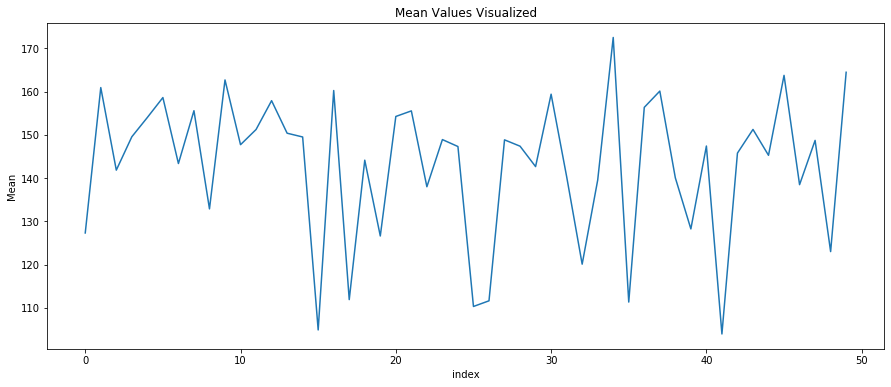

In [11]:
#For Visualizing 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(range(50), Means)
plt.title('Mean Values Visualized')
plt.ylabel('Mean')
plt.xlabel('index')
plt.show()

In [10]:
import statistics

print('Mean of MSE: ',statistics.mean(Means))
print('Std of MSE: ',statistics.stdev(Means))

Mean of MSE:  143.10875482997463
Std of MSE:  16.80678751287031


Mean of MSE decreased but Std of MSE slightly increased